# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.metrics import classification_report_imbalanced, geometric_mean_score


In [10]:
df_final = pd.read_csv("cleaned_data.csv")
df_final.head()

,lead_stay_interaction,wants_extra_baggage,wants_preferred_seat,booking_complete,sales_channel_Internet,sales_channel_Mobile,flight_duration_category_long-haul,flight_duration_category_medium-haul,purchase_lead_category_0-100,purchase_lead_category_101-200,purchase_lead_category_201-300,purchase_lead_category_301-400,purchase_lead_category_401-500,booking_origin_continent_Africa,booking_origin_continent_Asia,booking_origin_continent_Europe,booking_origin_continent_Middle_East,booking_origin_continent_North_America,booking_origin_continent_Oceania,booking_origin_continent_South_America
0,4978.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2240.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5346.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2976.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1496.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Separate features and target

In [11]:
X= df_final.drop('booking_complete', axis=1)
y= df_final['booking_complete']

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48993 entries, 0 to 48992
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   lead_stay_interaction                   48993 non-null  float64
 1   wants_extra_baggage                     48993 non-null  float64
 2   wants_preferred_seat                    48993 non-null  float64
 3   sales_channel_Internet                  48993 non-null  float64
 4   sales_channel_Mobile                    48993 non-null  float64
 5   flight_duration_category_long-haul      48993 non-null  float64
 6   flight_duration_category_medium-haul    48993 non-null  float64
 7   purchase_lead_category_0-100            48993 non-null  float64
 8   purchase_lead_category_101-200          48993 non-null  float64
 9   purchase_lead_category_201-300          48993 non-null  float64
 10  purchase_lead_category_301-400          48993 non-null  fl

Split the data

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39194 entries, 38865 to 15795
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   lead_stay_interaction                   39194 non-null  float64
 1   wants_extra_baggage                     39194 non-null  float64
 2   wants_preferred_seat                    39194 non-null  float64
 3   sales_channel_Internet                  39194 non-null  float64
 4   sales_channel_Mobile                    39194 non-null  float64
 5   flight_duration_category_long-haul      39194 non-null  float64
 6   flight_duration_category_medium-haul    39194 non-null  float64
 7   purchase_lead_category_0-100            39194 non-null  float64
 8   purchase_lead_category_101-200          39194 non-null  float64
 9   purchase_lead_category_201-300          39194 non-null  float64
 10  purchase_lead_category_301-400          39194 non-null  flo

Proportion of target in train and test

In [15]:
print(y_train.value_counts(), y_train.value_counts(normalize=True)*100)
print(y_test.value_counts(), y_test.value_counts(normalize=True)*100)

booking_complete
0.0    33424
1.0     5770
Name: count, dtype: int64 booking_complete
0.0    85.278359
1.0    14.721641
Name: proportion, dtype: float64
booking_complete
0.0    8326
1.0    1473
Name: count, dtype: int64 booking_complete
0.0    84.967854
1.0    15.032146
Name: proportion, dtype: float64


Train Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import classification_report

# Define steps for a pipeline
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Parameter grid for inner CV
param_grid = {
    'rf__max_depth': [10, 20, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 5],
    'rf__class_weight': ['balanced', {0: 1, 1: 5}, {0: 1, 1: 10}],
    'rf__max_features': ['sqrt', 'log2']
}


# Define inner cross-validation (for GridSearchCV)
inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Set up GridSearchCV with pipeline and parameter grid
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=inner_cv, scoring='f1', n_jobs=-1)


# Define outer cross-validation
outer_cv = KFold(n_splits=4, shuffle=True, random_state=42)

# Evaluate model with outer cross-validation
outer_scores = cross_val_score(grid_search, X_train, y_train, cv=outer_cv, scoring='f1', n_jobs=-1)
print("Outer CV F1 scores:", outer_scores)
print("Mean outer CV F1 score:", np.mean(outer_scores))

Outer CV F1 scores: [0.27755725 0.28889252 0.27939317 0.27624661]
Mean outer CV F1 score: 0.2805223909651516


Prediction

In [17]:
# Fit the GridSearchCV on the entire training set
grid_search.fit(X_train, y_train)

# Print the best parameters from GridSearch
print("Best parameters from GridSearch:", grid_search.best_params_)

c:\Users\PC\Desktop\Bala\Virtual internship\British airways\.venv\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters from GridSearch: {'rf__class_weight': {0: 1, 1: 5}, 'rf__max_depth': 20, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 2}


Evaluation of model on test set

In [18]:
# Now, you can make predictions using the best model
y_pred = grid_search.predict(X_test)

# Evaluate performance on the test set
from sklearn.metrics import accuracy_score
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on Test Set: 0.5349525461781814
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.52      0.66      8326
         1.0       0.18      0.61      0.28      1473

    accuracy                           0.53      9799
   macro avg       0.53      0.56      0.47      9799
weighted avg       0.78      0.53      0.60      9799



In [19]:
pd.crosstab(y_test, y_pred, rownames=['Booking'], colnames=['Predicted class'])

Predicted class,0.0,1.0
Booking,,
0.0,4348,3978
1.0,579,894


In [20]:
# Get predicted probabilities
y_pred_prob = grid_search.predict_proba(X_test)[:, 1]

# Apply threshold (0.55 here)
threshold = 0.55
y_pred = (y_pred_prob >= threshold).astype(int)

# Evaluate performance on the test set
from sklearn.metrics import accuracy_score
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on Test Set: 0.5975099499948975
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.61      0.72      8326
         1.0       0.19      0.51      0.28      1473

    accuracy                           0.60      9799
   macro avg       0.53      0.56      0.50      9799
weighted avg       0.77      0.60      0.65      9799



In [28]:
pd.crosstab(y_test, y_pred, rownames=['Booking'], colnames=['Predicted class'])

Predicted class,0,1
Booking,,
0.0,5098,3228
1.0,716,757


In [22]:
# Get the best model from the grid search (which includes SMOTE and RandomForest)
best_rf_model = grid_search.best_estimator_


# Extract the RandomForest model from the pipeline
rf_model = best_rf_model.named_steps['rf']



Extracting feature importance

In [23]:
X_train_df = pd.DataFrame(X_train, columns=X_train.columns
                                 )
# Get feature importance from the best RandomForest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to view feature importance
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': X_train_df.columns,  # Assuming X_train_scaled is a DataFrame with column names
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
print(importance_df)


                                   Feature  Importance
0                    lead_stay_interaction    0.313743
1                      wants_extra_baggage    0.150975
2                     wants_preferred_seat    0.113995
7             purchase_lead_category_0-100    0.082161
17        booking_origin_continent_Oceania    0.079225
13           booking_origin_continent_Asia    0.071345
8           purchase_lead_category_101-200    0.050180
9           purchase_lead_category_201-300    0.024476
3                   sales_channel_Internet    0.024434
4                     sales_channel_Mobile    0.023645
6     flight_duration_category_medium-haul    0.021636
5       flight_duration_category_long-haul    0.019973
10          purchase_lead_category_301-400    0.012417
14         booking_origin_continent_Europe    0.004210
16  booking_origin_continent_North_America    0.003472
11          purchase_lead_category_401-500    0.002189
15    booking_origin_continent_Middle_East    0.001273
12        

Visualize Feature Importance

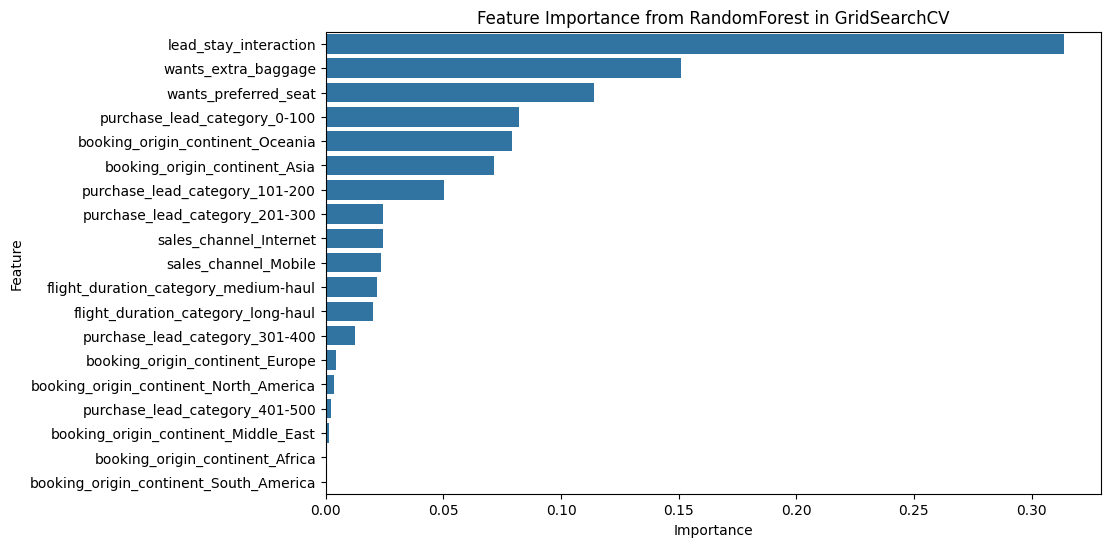

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from RandomForest in GridSearchCV')
plt.show()


Save the model with joblib

In [25]:
import joblib

joblib.dump(best_rf_model, 'random_forest_model_1.pkl')

['random_forest_model_1.pkl']

Model Interpretability

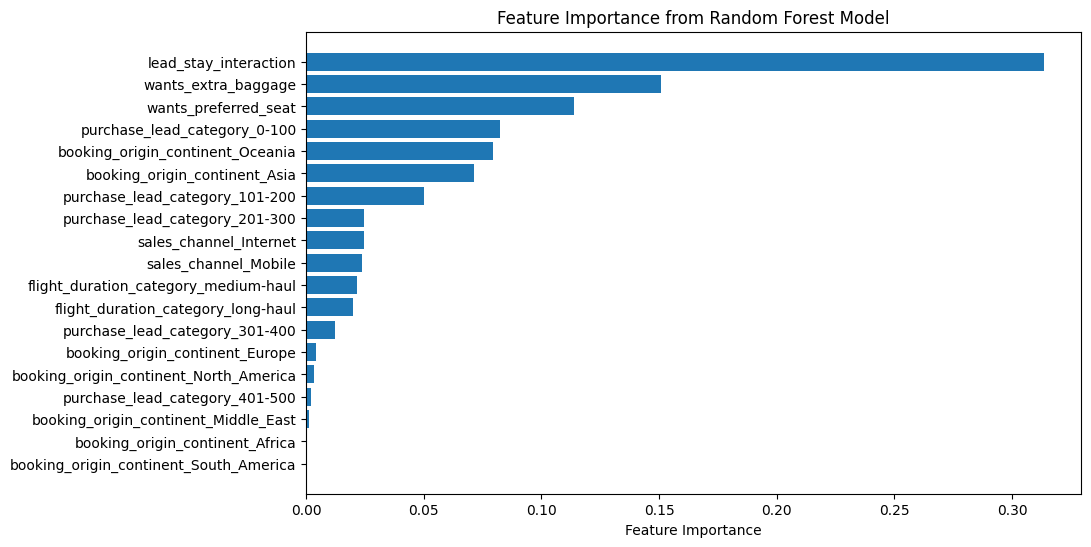

In [26]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved pipeline model
loaded_model = joblib.load('random_forest_model_1.pkl')

# Extract the RandomForestClassifier from the pipeline
rf_model = loaded_model.named_steps['rf']

# Get feature importances from the RandomForest model
feature_importances = rf_model.feature_importances_

# Assuming X_train is a pandas DataFrame and contains the feature names
# If X_train is a DataFrame, use X_train.columns to get the feature names
feature_names = X_train.columns

# Create a DataFrame for easy visualization of feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()  # To have the most important features at the top
plt.show()


In [34]:
import shap
sm = SMOTE(sampling_strategy='minority', random_state=42)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

# Extract the trained RandomForest model from the pipeline
rf_model = grid_search.best_estimator_.named_steps['rf']

# Create a SHAP explainer for the RandomForest model
explainer = shap.TreeExplainer(rf_model)

# Get SHAP values for the training data
shap_values = explainer.shap_values(X_sm)

# Check the shape of SHAP values
print("Shape of shap_values:", len(shap_values))  # Should be 2 for binary classification

if len(shap_values) > 1:
    print("Shape of shap_values[1]:", shap_values[1].shape)

# Check the shape of the original data
print("Shape of X_train:", X_sm.shape)

# Plot SHAP values for class 1 (booking complete), if it's available
# For binary classification, shap_values[0] and shap_values[1] correspond to each class
shap.summary_plot(shap_values[1], X_sm)  # Change index if needed


Shape of shap_values: 66848
Shape of shap_values[1]: (19, 2)
Shape of X_train: (66848, 19)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [35]:
# Print the shape of shap_values
print("Shape of shap_values:", len(shap_values))  # Number of classes
if len(shap_values) > 1:
    print("Shape of shap_values[1]:", shap_values[1].shape)

Shape of shap_values: 66848
Shape of shap_values[1]: (19, 2)


Saving SHAP

In [32]:
# Save the SHAP summary plot or explanation
shap.summary_plot(shap_values[1], X_train, show=False)
plt.savefig("shap_summary_plot.png")


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.